#### Conway Juego de la vida no optimizado

<IPython.core.display.Javascript object>


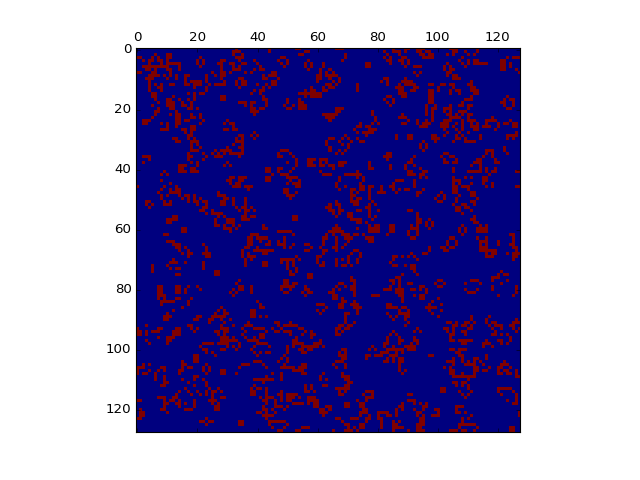

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.animation as animation

%matplotlib notebook

def vecinos(N,(n,m)):
    return [(n-1%N,m%N),(n%N,(m-1)%N),((n+1)%N,m%N),(n%N,(m+1)%N),\
            ((n-1)%N,(m-1)%N),((n-1)%N,(m+1)%N),\
            ((n+1)%N,(m+1)%N),((n+1)%N,(m-1)%N)]



M = np.array([[random.randint(0,1) for _ in range(128)] \
              for _ in range(128)])
##M[8,8] = 1;M[8,9] = 1;M[9,9] = 1;M[9,8] = 1;M[10,8] = 1;M[8,10] = 1


def siguiente(M):
    N = M.shape[0]
    M2 = np.array([[0]*N for _ in range(N)])
    for p in range(N):
        for q in range(N):
            L = vecinos(N,(p,q))
            vivos =len([1 for par in L if M[par[0],par[1]] == 1])
            if (M[p,q] == 1) and (2 <= vivos <= 3):
                M2[p,q] = 1
            elif  (M[p,q] == 0) and (vivos == 3):
                M2[p,q] = 1
    
    return M2


##Animación

def generate_data(M):
       return siguiente(M)

def update(data):
    mat.set_data(data)
    return mat 

def data_gen():
    global M
    M = generate_data(M)
    yield M

fig, ax = plt.subplots()
mat = ax.matshow(generate_data(M))

ani = animation.FuncAnimation(fig, update, data_gen,interval=1000)
plt.show()
